<a href="https://colab.research.google.com/github/shouvikcirca/PCB_Defect_Detection/blob/master/Densenet121_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras 
from keras.applications import DenseNet121
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [ ]:
#######################

In [2]:
conv_base = DenseNet121(weights='imagenet', include_top = False, input_shape=(300,300,3))

29089792/29084464 [==============================] - 3s 0us/step


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

In [ ]:
# conv_base.summary()

In [5]:
import pickle
# X = pickle.load(open(f'pickle_files/X2669.pkl', 'rb'))
# y = pickle.load(open(f'pickle_files/y2669.pkl', 'rb'))
X = pickle.load(open("gdrive/My Drive/X2669.pkl", 'rb'))
y = pickle.load(open("gdrive/My Drive/y2669.pkl", 'rb'))



X = X.permute(0,2,3,1).numpy()
y = y.numpy()

dataset_size = X.shape[0]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
del X
del y

In [8]:
nos = X_train.shape[0]
nos

2135

In [7]:
((y_train==1).sum())/((y_train==0).sum()),((y_test==1).sum())/((y_test==0).sum())

(15.811023622047244, 23.272727272727273)

In [9]:
Xtrain_zeros = X_train[y_train == 0]
Xtrain_zeros.shape

(127, 300, 300, 3)

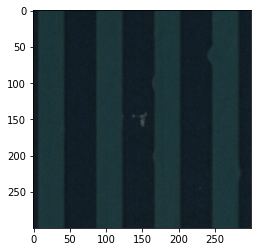

In [17]:
plt.imshow(Xtrain_zeros[2])

In [15]:
datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

In [16]:
datagen.fit(X_train)

In [18]:
bs = 34
numit = NumpyArrayIterator(
    X_train, y_train, datagen, batch_size=bs, shuffle=False, sample_weight=None,
    seed=None, data_format=None, save_to_dir=None, save_prefix='',
    save_format='png', subset=None, dtype=None
)

In [19]:
train_samples = np.zeros(shape=(nos,300,300,3))
train_labels = np.zeros(shape=(nos))
i = 0
for samples_batch,labels_batch in numit:
    train_samples[i*bs:(i+1)*bs] = samples_batch
    train_labels[i*bs:(i+1)*bs] = labels_batch
    i+=1
    if (i*bs)>=nos:
        break

In [20]:
del X_train
del y_train

In [21]:
trainsamples_zeros = train_samples[train_labels == 0]
Xtrain_zeros.shape

(127, 300, 300, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


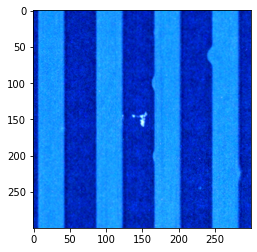

In [22]:
plt.imshow(trainsamples_zeros[2])

In [23]:
from keras import models

layer_outputs = [layer.output for layer in conv_base.layers[:8]]
activation_model = models.Model(inputs = conv_base.input, outputs = layer_outputs)

In [25]:
activations = activation_model.predict(trainsamples_zeros[2].reshape(1,300,300,3))

In [26]:
one = activations[7]
one.shape

(1, 75, 75, 64)

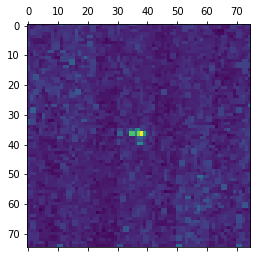

In [34]:
plt.matshow(one[0,:,:,1], cmap = 'viridis')

In [ ]:
#########################################################################################################